In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams as rcP
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/real_estate_data_bayut_full.csv')
df.head()

,link,price,currency,type,beds,baths,area,location,down_payment,plan_type
0,https://www.bayut.eg/en/property/details-50118...,"7,800,000",EGP,Villa,3.0,2.0,155 Sq. M.,"Sheikh Zayed, Giza","EGP 390,000",Off-Plan
1,https://www.bayut.eg/en/property/details-50118...,"7,941,000",EGP,Apartment,2.0,1.0,126 Sq. M.,"Badya Palm Hills Compound, 6th of October, Giza","EGP 794,100",NaN
2,https://www.bayut.eg/en/property/details-50118...,"25,000,000",EGP,Apartment,4.0,4.0,260 Sq. M.,"Cairo Festival City, New Cairo, Cairo",NaN,NaN
3,https://www.bayut.eg/en/property/details-50118...,"7,964,910",EGP,Duplex,3.0,3.0,216 Sq. M.,"Mostakbal City, Cairo","EGP 7,000,000",Off-Plan
4,https://www.bayut.eg/en/property/details-50118...,"11,500,000",EGP,Apartment,3.0,3.0,230 Sq. M.,"Rehab City Compound, New Cairo, Cairo",NaN,NaN


In [ ]:
df.shape

(50000, 10)

In [ ]:
df.groupby('location')['location'].agg('count')

,location
location,
"10th District, Sheikh Zayed, Giza",16
"10th of Ramadan, Sharqia",19
"11th District, 6th of October, Giza",1
"11th District, Sheikh Zayed, Giza",1
"12th District, Sheikh Zayed, Giza",1
...,...
"Zezenia, Alexandria",11
"Zizinia El Mostakbal, Mostakbal City, Cairo",4
"Zizinia Gardens Compound, New Cairo, Cairo",8


In [ ]:
df.groupby('type')['type'].agg('count')

,type
type,
Apartment,28282
Cabin,14
Chalet,5103
Duplex,1988
Hotel Apartment,169
Other Residential,51
Penthouse,1289
Residential Land,36
Roof,6


In [ ]:
df.groupby('currency')['currency'].agg('count')

,currency
currency,
EGP,50000


In [ ]:
df.groupby('beds')['beds'].agg('count')

,beds
beds,
1.0,2526
2.0,10769
3.0,24193
4.0,7952
5.0,2550
6.0,651
7.0,258
8.0,63
9.0,26


In [ ]:
df.groupby('baths')['baths'].agg('count')

,baths
baths,
1.0,5198
2.0,16973
3.0,17612
4.0,6673
5.0,2218
6.0,739
7.0,310
8.0,109
9.0,27


In [ ]:
df.groupby('area')['area'].agg('count')

,area
area,
1 Sq. M.,11
"1,000 Sq. M.",32
"1,015 Sq. M.",1
"1,027 Sq. M.",1
"1,038 Sq. M.",1
...,...
981 Sq. M.,1
982 Sq. M.,1
987 Sq. M.,2


In [ ]:
df.groupby('down_payment')['down_payment'].agg('count')

,down_payment
down_payment,
EGP 1,37
"EGP 1,000,000",548
"EGP 1,000,256",1
"EGP 1,000,464",2
"EGP 1,001,500",1
...,...
"EGP 997,500",6
"EGP 997,625",1
"EGP 998,400",1


In [ ]:
df.groupby('plan_type')['plan_type'].agg('count')

,plan_type
plan_type,
Off-Plan,18967


In [ ]:
df = df.drop('plan_type', axis='columns')
df.head()

,link,price,currency,type,beds,baths,area,location,down_payment
0,https://www.bayut.eg/en/property/details-50118...,"7,800,000",EGP,Villa,3.0,2.0,155 Sq. M.,"Sheikh Zayed, Giza","EGP 390,000"
1,https://www.bayut.eg/en/property/details-50118...,"7,941,000",EGP,Apartment,2.0,1.0,126 Sq. M.,"Badya Palm Hills Compound, 6th of October, Giza","EGP 794,100"
2,https://www.bayut.eg/en/property/details-50118...,"25,000,000",EGP,Apartment,4.0,4.0,260 Sq. M.,"Cairo Festival City, New Cairo, Cairo",NaN
3,https://www.bayut.eg/en/property/details-50118...,"7,964,910",EGP,Duplex,3.0,3.0,216 Sq. M.,"Mostakbal City, Cairo","EGP 7,000,000"
4,https://www.bayut.eg/en/property/details-50118...,"11,500,000",EGP,Apartment,3.0,3.0,230 Sq. M.,"Rehab City Compound, New Cairo, Cairo",NaN


 **Data Cleaning**

In [ ]:
# checking for null values
df.isnull().sum()

,0
link,0
price,0
currency,0
type,0
beds,877
baths,20
area,0
location,0
down_payment,23040


In [ ]:
# Applying median to the down_payment and beds column
from math import floor

beds_median = float(floor(df.beds.median()))
baths_median = float(floor(df.baths.median()))
df.beds = df.beds.fillna(beds_median)
df.baths = df.baths.fillna(baths_median)

In [ ]:
df.isnull().sum()


,0
link,0
price,0
currency,0
type,0
beds,0
baths,0
area,0
location,0
down_payment,23040


In [ ]:
df.area.unique()

array(['155 Sq. M.', '126 Sq. M.', '260 Sq. M.', '216 Sq. M.',
       '230 Sq. M.', '121 Sq. M.', '177 Sq. M.', '134 Sq. M.',
       '164 Sq. M.', '74 Sq. M.', '130 Sq. M.', '108 Sq. M.',
       '237 Sq. M.', '169 Sq. M.', '200 Sq. M.', '132 Sq. M.',
       '175 Sq. M.', '181 Sq. M.', '153 Sq. M.', '85 Sq. M.',
       '342 Sq. M.', '268 Sq. M.', '186 Sq. M.', '346 Sq. M.',
       '114 Sq. M.', '136 Sq. M.', '211 Sq. M.', '159 Sq. M.',
       '37 Sq. M.', '120 Sq. M.', '140 Sq. M.', '154 Sq. M.',
       '220 Sq. M.', '141 Sq. M.', '212 Sq. M.', '158 Sq. M.',
       '125 Sq. M.', '80 Sq. M.', '206 Sq. M.', '281 Sq. M.',
       '104 Sq. M.', '256 Sq. M.', '194 Sq. M.', '135 Sq. M.',
       '129 Sq. M.', '149 Sq. M.', '170 Sq. M.', '165 Sq. M.',
       '315 Sq. M.', '160 Sq. M.', '145 Sq. M.', '124 Sq. M.',
       '151 Sq. M.', '75 Sq. M.', '241 Sq. M.', '530 Sq. M.', '54 Sq. M.',
       '390 Sq. M.', '240 Sq. M.', '106 Sq. M.', '119 Sq. M.',
       '150 Sq. M.', '228 Sq. M.', '112 Sq. M.'

In [ ]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
# Displaying all the rows that are not integers
df[~df['area'].apply(isFloat)]

,link,price,currency,type,beds,baths,area,location,down_payment
0,https://www.bayut.eg/en/property/details-50118...,"7,800,000",EGP,Villa,3.0,2.0,155 Sq. M.,"Sheikh Zayed, Giza","EGP 390,000"
1,https://www.bayut.eg/en/property/details-50118...,"7,941,000",EGP,Apartment,2.0,1.0,126 Sq. M.,"Badya Palm Hills Compound, 6th of October, Giza","EGP 794,100"
2,https://www.bayut.eg/en/property/details-50118...,"25,000,000",EGP,Apartment,4.0,4.0,260 Sq. M.,"Cairo Festival City, New Cairo, Cairo",NaN
3,https://www.bayut.eg/en/property/details-50118...,"7,964,910",EGP,Duplex,3.0,3.0,216 Sq. M.,"Mostakbal City, Cairo","EGP 7,000,000"
4,https://www.bayut.eg/en/property/details-50118...,"11,500,000",EGP,Apartment,3.0,3.0,230 Sq. M.,"Rehab City Compound, New Cairo, Cairo",NaN
...,...,...,...,...,...,...,...,...,...
49995,https://www.bayut.eg/en/property/details-50081...,"4,500,000",EGP,Apartment,3.0,2.0,195 Sq. M.,"Al Andalous, New Cairo, Cairo",NaN
49996,https://www.bayut.eg/en/property/details-50075...,"7,850,000",EGP,Apartment,3.0,3.0,175 Sq. M.,"Stone Residence Compound, New Cairo, Cairo","EGP 1,650,000"
49997,https://www.bayut.eg/en/property/details-50072...,"17,000,000",EGP,Twin House,3.0,4.0,290 Sq. M.,"Lac Ville Compound, Sheikh Zayed, Giza",NaN
49998,https://www.bayut.eg/en/property/details-20131...,"10,350,000",EGP,Apartment,2.0,3.0,163 Sq. M.,"Aeon Compound, 6th of October, Giza",NaN


In [ ]:
def clean_area_column(df, column_name, new_column_name=None, unit_conversion=None):
   import re
   import pandas as pd

   result_df = df.copy()
   output_column = new_column_name if new_column_name else column_name

   def extract_area(text):
       if pd.isna(text):
           return None

       if isinstance(text, (int, float)):
           return float(text)

       try:
           text = str(text)
           numeric_match = re.search(r'(\d+(?:\.\d+)?)', text)
           if not numeric_match:
               return None

           area_value = float(numeric_match.group(1))

           if unit_conversion:
               for unit, factor in unit_conversion.items():
                   if unit.lower() in text.lower():
                       area_value *= factor
                       break

           return area_value
       except:
           return None

   result_df[output_column] = result_df[column_name].apply(extract_area)

   return result_df

In [ ]:
clean_area_column(df, 'area', 'area_sqm')

,link,price,currency,type,beds,baths,area,location,down_payment,area_sqm
0,https://www.bayut.eg/en/property/details-50118...,"7,800,000",EGP,Villa,3.0,2.0,155 Sq. M.,"Sheikh Zayed, Giza","EGP 390,000",155.0
1,https://www.bayut.eg/en/property/details-50118...,"7,941,000",EGP,Apartment,2.0,1.0,126 Sq. M.,"Badya Palm Hills Compound, 6th of October, Giza","EGP 794,100",126.0
2,https://www.bayut.eg/en/property/details-50118...,"25,000,000",EGP,Apartment,4.0,4.0,260 Sq. M.,"Cairo Festival City, New Cairo, Cairo",NaN,260.0
3,https://www.bayut.eg/en/property/details-50118...,"7,964,910",EGP,Duplex,3.0,3.0,216 Sq. M.,"Mostakbal City, Cairo","EGP 7,000,000",216.0
4,https://www.bayut.eg/en/property/details-50118...,"11,500,000",EGP,Apartment,3.0,3.0,230 Sq. M.,"Rehab City Compound, New Cairo, Cairo",NaN,230.0
...,...,...,...,...,...,...,...,...,...,...
49995,https://www.bayut.eg/en/property/details-50081...,"4,500,000",EGP,Apartment,3.0,2.0,195 Sq. M.,"Al Andalous, New Cairo, Cairo",NaN,195.0
49996,https://www.bayut.eg/en/property/details-50075...,"7,850,000",EGP,Apartment,3.0,3.0,175 Sq. M.,"Stone Residence Compound, New Cairo, Cairo","EGP 1,650,000",175.0
49997,https://www.bayut.eg/en/property/details-50072...,"17,000,000",EGP,Twin House,3.0,4.0,290 Sq. M.,"Lac Ville Compound, Sheikh Zayed, Giza",NaN,290.0
49998,https://www.bayut.eg/en/property/details-20131...,"10,350,000",EGP,Apartment,2.0,3.0,163 Sq. M.,"Aeon Compound, 6th of October, Giza",NaN,163.0


In [ ]:
df = clean_area_column(df, 'area', new_column_name='area_numeric')

In [ ]:
df = df.drop('area', axis='columns')
df.head()

,link,price,currency,type,beds,baths,location,down_payment,area_numeric
0,https://www.bayut.eg/en/property/details-50118...,"7,800,000",EGP,Villa,3.0,2.0,"Sheikh Zayed, Giza","EGP 390,000",155.0
1,https://www.bayut.eg/en/property/details-50118...,"7,941,000",EGP,Apartment,2.0,1.0,"Badya Palm Hills Compound, 6th of October, Giza","EGP 794,100",126.0
2,https://www.bayut.eg/en/property/details-50118...,"25,000,000",EGP,Apartment,4.0,4.0,"Cairo Festival City, New Cairo, Cairo",NaN,260.0
3,https://www.bayut.eg/en/property/details-50118...,"7,964,910",EGP,Duplex,3.0,3.0,"Mostakbal City, Cairo","EGP 7,000,000",216.0
4,https://www.bayut.eg/en/property/details-50118...,"11,500,000",EGP,Apartment,3.0,3.0,"Rehab City Compound, New Cairo, Cairo",NaN,230.0


In [ ]:
df.isnull().sum()


,0
link,0
price,0
currency,0
type,0
beds,0
baths,0
location,0
down_payment,23040
area_numeric,0


In [ ]:
df['down_payment'].replace({None: 0, '': 0, "Nan": 0, "NaN": 0}, inplace=True)
df.head()



<ipython-input-24-7aac18f7b30a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['down_payment'].replace({None: 0, '': 0, "Nan": 0, "NaN": 0}, inplace=True)


,link,price,currency,type,beds,baths,location,down_payment,area_numeric
0,https://www.bayut.eg/en/property/details-50118...,"7,800,000",EGP,Villa,3.0,2.0,"Sheikh Zayed, Giza","EGP 390,000",155.0
1,https://www.bayut.eg/en/property/details-50118...,"7,941,000",EGP,Apartment,2.0,1.0,"Badya Palm Hills Compound, 6th of October, Giza","EGP 794,100",126.0
2,https://www.bayut.eg/en/property/details-50118...,"25,000,000",EGP,Apartment,4.0,4.0,"Cairo Festival City, New Cairo, Cairo",0,260.0
3,https://www.bayut.eg/en/property/details-50118...,"7,964,910",EGP,Duplex,3.0,3.0,"Mostakbal City, Cairo","EGP 7,000,000",216.0
4,https://www.bayut.eg/en/property/details-50118...,"11,500,000",EGP,Apartment,3.0,3.0,"Rehab City Compound, New Cairo, Cairo",0,230.0


In [ ]:
df.isnull().sum()


,0
link,0
price,0
currency,0
type,0
beds,0
baths,0
location,0
down_payment,0
area_numeric,0


In [ ]:
df = df.drop('link', axis='columns')
df.head()
#not useful

,price,currency,type,beds,baths,location,down_payment,area_numeric
0,"7,800,000",EGP,Villa,3.0,2.0,"Sheikh Zayed, Giza","EGP 390,000",155.0
1,"7,941,000",EGP,Apartment,2.0,1.0,"Badya Palm Hills Compound, 6th of October, Giza","EGP 794,100",126.0
2,"25,000,000",EGP,Apartment,4.0,4.0,"Cairo Festival City, New Cairo, Cairo",0,260.0
3,"7,964,910",EGP,Duplex,3.0,3.0,"Mostakbal City, Cairo","EGP 7,000,000",216.0
4,"11,500,000",EGP,Apartment,3.0,3.0,"Rehab City Compound, New Cairo, Cairo",0,230.0


In [ ]:
df1 = df.copy()
df1['price'] = pd.to_numeric(df1['price'].str.replace('[$,]', '', regex=True), errors='coerce')
df1['price_per_sqm'] = df1['price'] / df1['area_numeric']
df1.head()

,price,currency,type,beds,baths,location,down_payment,area_numeric,price_per_sqm
0,7800000,EGP,Villa,3.0,2.0,"Sheikh Zayed, Giza","EGP 390,000",155.0,50322.580645
1,7941000,EGP,Apartment,2.0,1.0,"Badya Palm Hills Compound, 6th of October, Giza","EGP 794,100",126.0,63023.809524
2,25000000,EGP,Apartment,4.0,4.0,"Cairo Festival City, New Cairo, Cairo",0,260.0,96153.846154
3,7964910,EGP,Duplex,3.0,3.0,"Mostakbal City, Cairo","EGP 7,000,000",216.0,36874.583333
4,11500000,EGP,Apartment,3.0,3.0,"Rehab City Compound, New Cairo, Cairo",0,230.0,50000.000000


In [ ]:
df1['price_per_sqm'] = df1['price_per_sqm'].round(0)
df1.head()


,price,currency,type,beds,baths,location,down_payment,area_numeric,price_per_sqm
0,7800000,EGP,Villa,3.0,2.0,"Sheikh Zayed, Giza","EGP 390,000",155.0,50323.0
1,7941000,EGP,Apartment,2.0,1.0,"Badya Palm Hills Compound, 6th of October, Giza","EGP 794,100",126.0,63024.0
2,25000000,EGP,Apartment,4.0,4.0,"Cairo Festival City, New Cairo, Cairo",0,260.0,96154.0
3,7964910,EGP,Duplex,3.0,3.0,"Mostakbal City, Cairo","EGP 7,000,000",216.0,36875.0
4,11500000,EGP,Apartment,3.0,3.0,"Rehab City Compound, New Cairo, Cairo",0,230.0,50000.0


In [ ]:
locations = list(df['location'].unique())
print(len(locations))

986


In [ ]:
# Removing the extra spaces at the end
df1.location = df1.location.apply(lambda x: x.strip())

# Calulating all the unqiue values in 'location' column
location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
"Madinaty, Cairo",1900
"5th Settlement, New Cairo, Cairo",1870
"Taj City Compound, New Cairo, Cairo",1723
"Sarai, Mostakbal City, Cairo",1674
"New Cairo, Cairo",1193
...,...
"3rd District, 6th of October, Giza",1
"2nd District, 6th of October, Giza",1
"1st District, Sheikh Zayed, Giza",1


In [ ]:
print(len(location_stats[location_stats<=10]), len(df1.location.unique()))


528 986


In [ ]:
df1.head()


,price,currency,type,beds,baths,location,down_payment,area_numeric,price_per_sqm
0,7800000,EGP,Villa,3.0,2.0,"Sheikh Zayed, Giza","EGP 390,000",155.0,50323.0
1,7941000,EGP,Apartment,2.0,1.0,"Badya Palm Hills Compound, 6th of October, Giza","EGP 794,100",126.0,63024.0
2,25000000,EGP,Apartment,4.0,4.0,"Cairo Festival City, New Cairo, Cairo",0,260.0,96154.0
3,7964910,EGP,Duplex,3.0,3.0,"Mostakbal City, Cairo","EGP 7,000,000",216.0,36875.0
4,11500000,EGP,Apartment,3.0,3.0,"Rehab City Compound, New Cairo, Cairo",0,230.0,50000.0


In [ ]:
# Labelling the locations with less than or equal to 10 occurences to 'other'
locations_less_than_10 = location_stats[location_stats<=10]

df1.location = df1.location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(df1.location.unique())

459

In [ ]:
df1.head()

,price,currency,type,beds,baths,location,down_payment,area_numeric,price_per_sqm
0,7800000,EGP,Villa,3.0,2.0,"Sheikh Zayed, Giza","EGP 390,000",155.0,50323.0
1,7941000,EGP,Apartment,2.0,1.0,"Badya Palm Hills Compound, 6th of October, Giza","EGP 794,100",126.0,63024.0
2,25000000,EGP,Apartment,4.0,4.0,"Cairo Festival City, New Cairo, Cairo",0,260.0,96154.0
3,7964910,EGP,Duplex,3.0,3.0,"Mostakbal City, Cairo","EGP 7,000,000",216.0,36875.0
4,11500000,EGP,Apartment,3.0,3.0,"Rehab City Compound, New Cairo, Cairo",0,230.0,50000.0


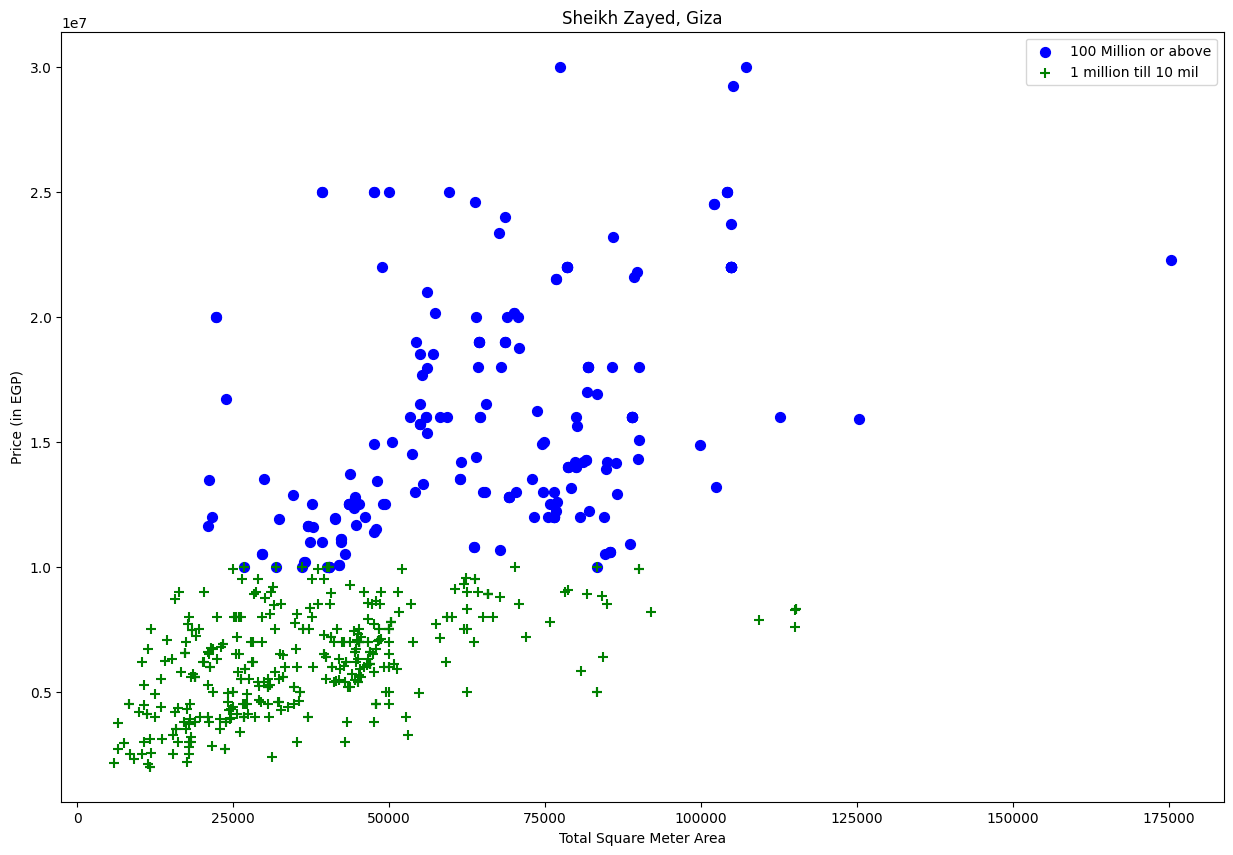

In [ ]:
df3 = df1
def plot_scatter_chart(df, location):
    Ehk2 = df[(df.location == location) & (df.price >= 10000000) & (df.price <= 30000000)]
    Ehk3 = df[(df.location == location) & (df.price >= 1000000) & (df.price <= 10000000)]
    rcP['figure.figsize'] = (15,10)
    plt.scatter(Ehk2.price_per_sqm, Ehk2.price, color='blue', label='100 Million or above', s=50)
    plt.scatter(Ehk3.price_per_sqm, Ehk3.price, color='green', marker='+', label='1 million till 10 mil', s=50)
    plt.xlabel('Total Square Meter Area')
    plt.ylabel('Price (in EGP)')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df3, 'Sheikh Zayed, Giza')

Text(0, 0.5, 'Count')

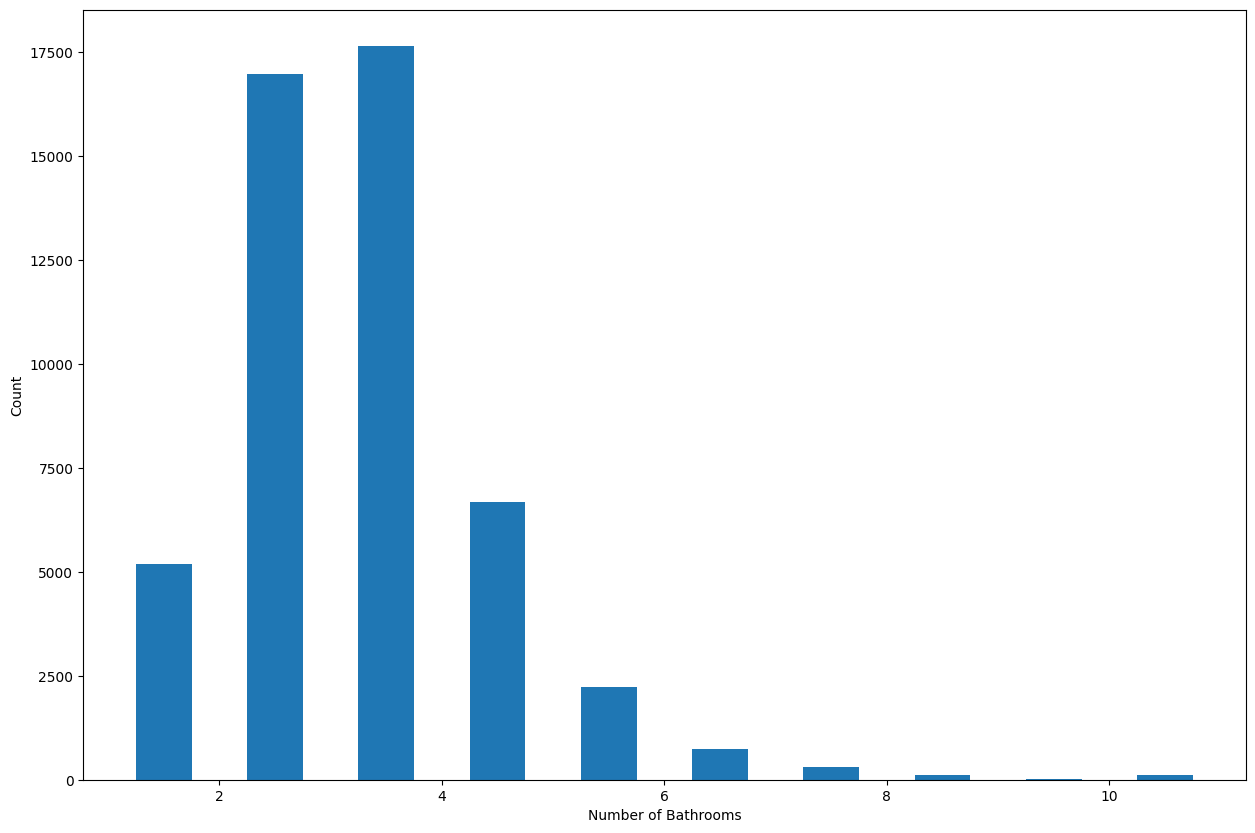

In [ ]:
df4 = df3
plt.hist(df4.baths, rwidth=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [ ]:
df5 = df4
df5.head()


,price,currency,type,beds,baths,location,down_payment,area_numeric,price_per_sqm
0,7800000,EGP,Villa,3.0,2.0,"Sheikh Zayed, Giza","EGP 390,000",155.0,50323.0
1,7941000,EGP,Apartment,2.0,1.0,"Badya Palm Hills Compound, 6th of October, Giza","EGP 794,100",126.0,63024.0
2,25000000,EGP,Apartment,4.0,4.0,"Cairo Festival City, New Cairo, Cairo",0,260.0,96154.0
3,7964910,EGP,Duplex,3.0,3.0,"Mostakbal City, Cairo","EGP 7,000,000",216.0,36875.0
4,11500000,EGP,Apartment,3.0,3.0,"Rehab City Compound, New Cairo, Cairo",0,230.0,50000.0


In [ ]:
df6 = df5.copy()
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.location).drop('other', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [ ]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.type)
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [ ]:
df6.head()

,price,currency,type,beds,baths,location,down_payment,area_numeric,price_per_sqm,"10th District, Sheikh Zayed, Giza",...,Hotel Apartment,Other Residential,Penthouse,Residential Land,Roof,Room,Townhouse,Twin House,Villa,iVilla
0,7800000,EGP,Villa,3.0,2.0,"Sheikh Zayed, Giza","EGP 390,000",155.0,50323.0,False,...,False,False,False,False,False,False,False,False,True,False
1,7941000,EGP,Apartment,2.0,1.0,"Badya Palm Hills Compound, 6th of October, Giza","EGP 794,100",126.0,63024.0,False,...,False,False,False,False,False,False,False,False,False,False
2,25000000,EGP,Apartment,4.0,4.0,"Cairo Festival City, New Cairo, Cairo",0,260.0,96154.0,False,...,False,False,False,False,False,False,False,False,False,False
3,7964910,EGP,Duplex,3.0,3.0,"Mostakbal City, Cairo","EGP 7,000,000",216.0,36875.0,False,...,False,False,False,False,False,False,False,False,False,False
4,11500000,EGP,Apartment,3.0,3.0,"Rehab City Compound, New Cairo, Cairo",0,230.0,50000.0,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df6.drop(['type','currency','location', 'down_payment'], axis='columns', inplace=True)
df6.head()

,price,beds,baths,area_numeric,price_per_sqm,"10th District, Sheikh Zayed, Giza","10th of Ramadan, Sharqia","16th District, Sheikh Zayed, Giza","1st District, New Cairo, Cairo","1st Settlement, New Cairo, Cairo",...,Hotel Apartment,Other Residential,Penthouse,Residential Land,Roof,Room,Townhouse,Twin House,Villa,iVilla
0,7800000,3.0,2.0,155.0,50323.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,7941000,2.0,1.0,126.0,63024.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,25000000,4.0,4.0,260.0,96154.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7964910,3.0,3.0,216.0,36875.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,11500000,3.0,3.0,230.0,50000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


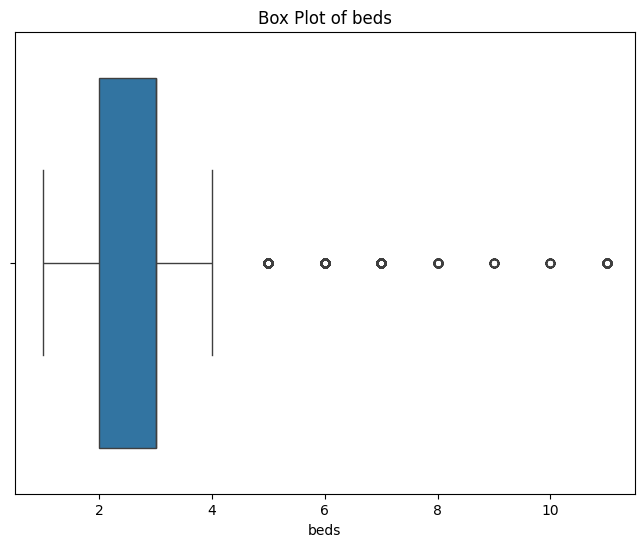

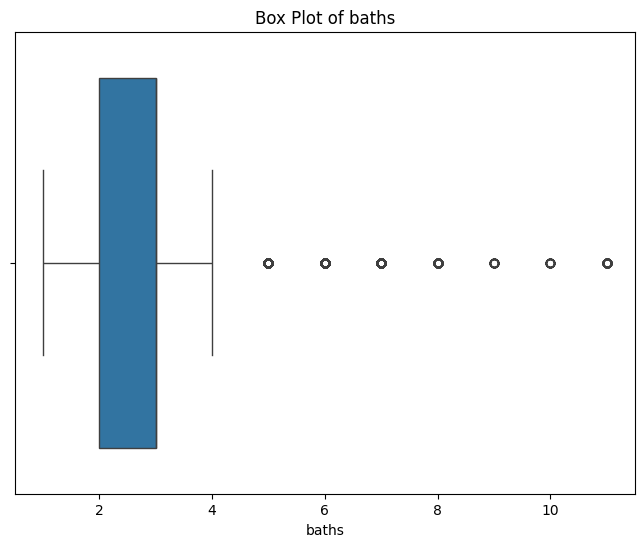

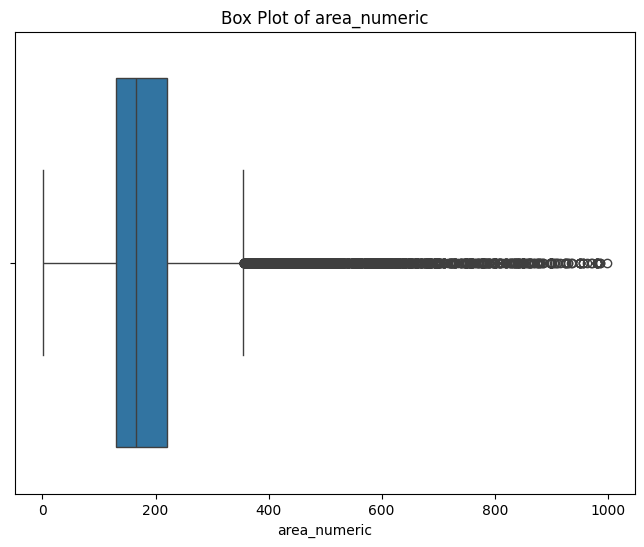

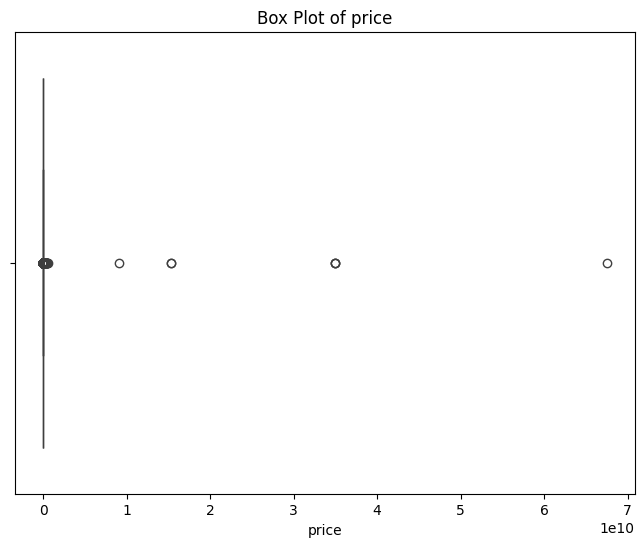

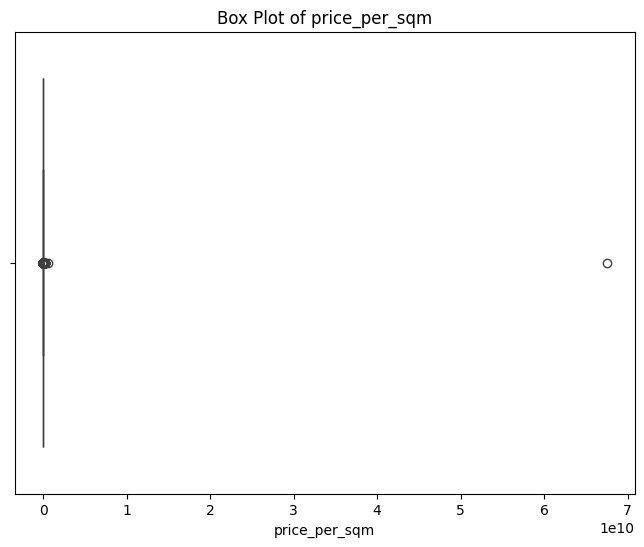

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for outlier detection
numerical_features = ['beds', 'baths', 'area_numeric', 'price', 'price_per_sqm']

# Create box plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(x=df6[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
import numpy as np

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

# Apply outlier removal to selected features
for feature in numerical_features:
    df6 = remove_outliers_iqr(df6, feature)

print("Shape of DataFrame after outlier removal:", df6.shape)

Shape of DataFrame after outlier removal: (40663, 477)


In [ ]:
df6.head()

,price,beds,baths,area_numeric,price_per_sqm,"10th District, Sheikh Zayed, Giza","10th of Ramadan, Sharqia","16th District, Sheikh Zayed, Giza","1st District, New Cairo, Cairo","1st Settlement, New Cairo, Cairo",...,Hotel Apartment,Other Residential,Penthouse,Residential Land,Roof,Room,Townhouse,Twin House,Villa,iVilla
0,7800000,3.0,2.0,155.0,50323.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,7941000,2.0,1.0,126.0,63024.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7964910,3.0,3.0,216.0,36875.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,11500000,3.0,3.0,230.0,50000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,3971000,3.0,2.0,121.0,32818.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df6.shape


(40663, 477)

In [ ]:
# Splitting the dataset into features and label
X = df6.drop('price', axis='columns')
y = df6['price']

In [ ]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Creating a function for GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model(X, y):
    # Scale features first
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'fit_intercept': [True, False]
                # 'normalize' is deprecated, using 'fit_intercept' instead
            }
        },

        'lasso': {
            'model': Lasso(max_iter=5000, tol=1e-3),  # Added to avoid convergence warnings
            'parameters': {
                'alpha': [0.1, 0.5, 1, 2],
                'selection': ['random', 'cyclic']
            }
        },

        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['squared_error', 'friedman_mse'],  # 'mse' is now 'squared_error'
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X_scaled, y)  # Using scaled features
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

In [ ]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that normalizes the data then fits a linear regression model
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    StandardScaler(),  # replaces normalize=True
    LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
)
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
model.score(X_test, y_test)

0.9354312935096278

In [ ]:
X.columns

Index(['beds', 'baths', 'area_numeric', 'price_per_sqm',
       '10th District, Sheikh Zayed, Giza', '10th of Ramadan, Sharqia',
       '16th District, Sheikh Zayed, Giza', '1st District, New Cairo, Cairo',
       '1st Settlement, New Cairo, Cairo', '2nd District, New Cairo, Cairo',
       ...
       'Hotel Apartment', 'Other Residential', 'Penthouse', 'Residential Land',
       'Roof', 'Room', 'Townhouse', 'Twin House', 'Villa', 'iVilla'],
      dtype='object', length=476)

In [ ]:
np.where(X.columns=='Hacienda Bay, North Coast, Matruh')[0][0]

np.int64(155)

In [ ]:
# For finding the appropriate area_type
np.where(X.columns=='Villa')[0][0]

np.int64(474)

In [ ]:
df6.head()


,price,beds,baths,area_numeric,price_per_sqm,"10th District, Sheikh Zayed, Giza","10th of Ramadan, Sharqia","16th District, Sheikh Zayed, Giza","1st District, New Cairo, Cairo","1st Settlement, New Cairo, Cairo",...,Hotel Apartment,Other Residential,Penthouse,Residential Land,Roof,Room,Townhouse,Twin House,Villa,iVilla
0,7800000,3.0,2.0,155.0,50323.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,7941000,2.0,1.0,126.0,63024.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7964910,3.0,3.0,216.0,36875.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,11500000,3.0,3.0,230.0,50000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,3971000,3.0,2.0,121.0,32818.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Creating a fuction to predict values
def prediction(location, beds, baths, area_numeric, type):

    loc_index, area_index = -1,-1

    if location!='other':
        loc_index = int(np.where(X.columns==location)[0][0])
    area_index = np.where(X.columns==type)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = beds
    x[2] = area_numeric

    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1



    predicted_price = model.predict([x])[0]
    rounded_price = round(predicted_price)
    millions_price = predicted_price / 1000000  # Divide by 1 million
    formatted_price = "{:.2f} Million EGP".format(millions_price)
    return formatted_price


In [ ]:
prediction('Madinaty, Cairo', 5, 3, 1000.0, 'Villa')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'42.89 Million EGP'